# Correlation

Task: Есть ли различия в выборе авто между мужчинами и женщинами 

Usefull links
- http://www.statsci.org/data/oz/carprefs.html
- https://en.wikipedia.org/wiki/Contingency_table
- https://www.youtube.com/watch?v=Po5LkYaIQpo&index=7&list=PLlb7e2G7aSpRG_Ve6kuxc9Biuwyf42kJx

# Libs

In [1]:
import pandas as pd
from pandas import plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlib
import pylab
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import math

# Data loading and simple EDA

In [2]:
df_raw = pd.read_excel('HW1_T4_car_prefs_data.xlsx')

In [3]:
df_raw.shape

(301, 22)

1. ID - Identification number of respondent
2. Age - Age of respondent (years)
3. Sex - 1=female, 2=male
4. LicYr - Time they have held a full driving licence, in years and months (years)
5. LicMth - Time they have held a full driving licence, in years and months (months)
6. ActCar - Make, model and year of car most often driven, coded to size of car 1=small, 2=medium, 3=large
7. Kids5 - Children under five, 1=yes, 2=no
8. Kids6 - Children 6 to 16, 1=yes, 2=no
9. PrefCar - Preferred car, coded to size of car 1=small, 2=medium, 3=large
10. Car15k - Preferred type of car if cost $15000, 1=small new car; 2=large second-hand car
11. Reason - 1=safety, 2=reliability, 3=cost, 4=performance, 5=comfort, 6=looks
12. Cost - How important is cost when buying a car? 1=not important, 2=little importance, 3=important, 4=very important
13. Reliable - How important is reliability ...?
14. Perform - How important is performance ...?
15. Fuel - How important is fuel consumption ...?
16. Safety - How important is safety ...?
17. AC/PS - How important is air conditioning/power steering ...?
18. Park - How important is ease of parking ...?
19. Room - How important is space/roominess ...?
20. Doors - How important is the number of doors ...?
21. Prestige - How important is prestige/style ...?
22. Colour - How important is colour ...?

In [4]:
df_raw.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ID,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Age,18,25,63,51,19,51,64,60,23,42,21,41,23,68,27
Sex,2,1,2,1,1,1,1,1,1,1,2,2,2,2,2
LicYr,0,8,46,35,2,30,35,35,5,20,4,24,5,50,10
LicMth,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ActCar,3,1,3,3,2,2,1,3,1,3,1,3,3,2,3
Kids5,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2
Kids6,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2
PreferCar,2,1,3,2,2,2,2,1,1,1,4,3,4,3,2
Car15K,2,1,2,2,1,2,2,1,1,1,2,2,2,1,2


Проверим данные на наличие пропусков

In [5]:
df_raw.isnull().sum()

ID           0
Age          1
Sex          1
LicYr        1
LicMth       1
ActCar       1
Kids5        1
Kids6        1
PreferCar    1
Car15K       1
Reason       1
Cost         1
Reliable     1
Perform      1
Fuel         1
Safety       1
AC/PS        1
Park         1
Room         1
Doors        1
Prestige     1
Colour       1
dtype: int64

Есть одна строка с пропущенными значениями. Удалим её

In [6]:
df_raw = df_raw.dropna()

Идентификационные номера опрошенных явно не влияют на выбор авто

In [7]:
df_raw = df_raw.drop('ID', 1)

Возраст, наличие детей и стаж автовладельцев также не пригодятся: в задаче требуется определить зависимость именно от пола владельцев

In [8]:
df_raw = df_raw.drop('Age', 1)
df_raw = df_raw.drop('LicYr', 1)
df_raw = df_raw.drop('LicMth', 1)
df_raw = df_raw.drop('Kids5', 1)
df_raw = df_raw.drop('Kids6', 1)

In [9]:
df_raw.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Sex,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
ActCar,3.0,1.0,3.0,3.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,2.0,3.0
PreferCar,2.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,4.0,3.0,4.0,3.0,2.0
Car15K,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
Reason,1.0,1.0,5.0,1.0,6.0,5.0,3.0,1.0,1.0,5.0,4.0,2.0,5.0,2.0,3.0
Cost,3.0,4.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
Reliable,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0
Perform,3.0,4.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Fuel,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0
Safety,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0


# Сравнение гистограмм распределений и анализ критерия Х-квадрат

(A, B) 

## Таблица сопряженности (Contingency table)

|       | $B_1$    | B_2      | ... | B_s      |       |
|-------|----------|----------|-----|----------|-------|
| $A_1$ | $n_{11}$ | $n_{12}$ | ... | $n_{1s}$ | $m_1$ |
| $A_2$ | $n_{21}$ | $n_{12}$ | ... | $n_{1s}$ | $m_2$ |
| ...   |  ...     |   ...    | ... |   .. .   | ..... |
| $A_r$ | $n_{r1}$ | $n_{r2}$ | ... | $n_{rs}$ | $m_r$ |
|       | $n_{1}$  | $n_{2}$  | ... | $n_{s}$  | $n$   |

Пусть $p_i=P(A_i)$, $q_i=P(B_i)$

A,B - независимы, если $p_{ij}=P(A_iB_j)=p_iq_j$.

$H_0$: A, B - независимы (vs $H_1: \exists i,j: p_{ij}\ne p_i q_j$

$$\chi^2=\sum_{i=1}^r\sum_{j=1}^c\frac{\left(n_{ij}-\frac{n_im_j}{n}\right)^2}{\frac{n_im_j}{n}}\rightarrow\zeta \sim \chi^2_{(r-1)(s-1)}$$


Из описания к датасету известно, что женщины-водители, участвующие в ДТП, чаще получают травмы, нежели мужчины. Вероятной причиной является то, что женщины предпочитают более маленькие автомобили, чем мужчины.

Данная гипотеза будет проверена далее. Также, возможно, удастся найти ещё различия в выборе автомобиля между мужчинами и женщинами

Сравним по-очереди между собой столбчатые диаграммы для мужчин и женщин по каждой переменной. Переменные будут рассматриваться отдельно (а не, например, в цикле), поэтому сделаем для удобства функцию

In [10]:
features = df_raw.columns
features = features.drop('Sex', 1)
len(features)

15

Переменная  ActCar


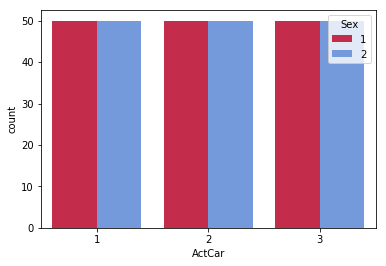

In [11]:
i = 0


def show_barplot(i):
    print('Переменная ', features[i])
    group_sizes = df_raw.groupby(['Sex', features[i]]).size()
    num_of_values = df_raw[features[i]].nunique() + 1
    plot_data = pd.DataFrame([(i, j, group_sizes[i][j]) for i in range(1, 3)
                              for j in range(1, num_of_values)],
                             columns=['Sex', features[i], 'count'])
    sns.barplot(data=plot_data,
                x=features[i],
                y='count',
                hue='Sex',
                palette=['crimson', 'cornflowerblue'])


show_barplot(i)

Подозительно одинаковые значения. Складывается ощущение, что анкетируемые были выбраны по наиболее часто используемому размеру автомобилей. Причём выбраны поровну, то есть мы работаем со сбалансированной выборкой

Переменная  PreferCar


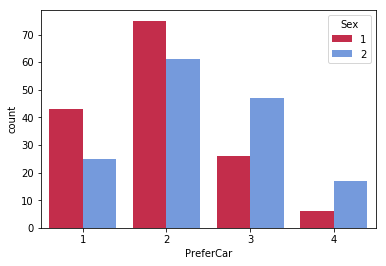

In [12]:
i = 1
show_barplot(i)

По графику видно, что женщины действительно чаще мужчин выбирают маленькие и средние автомобили. Мужчины же предпочитают большие автомобили.

Построим таблицу сопряжённости, а затем выведем тестовую статистику и p-value критерия X-квадрат. Также для удобства напишем функцию

In [35]:
def show_chi2(i):
    conj_table = pd.crosstab(df_raw['Sex'], df_raw[features[i]])
    display(conj_table)

    statistic, p_value, *_ = stats.chi2_contingency(conj_table)
    print('The test statistic: {}\nThe p-value of the test: {}'.format(
        statistic, p_value))


show_chi2(i)

PreferCar,1.0,2.0,3.0,4.0
Sex,,,,
1.0,43,75,26,6
2.0,25,61,47,17


The test statistic: 17.507847808569526
The p-value of the test: 0.0005555699275518034


P-значение для критерия Х-квадрат много меньше 5%. Из этого можно заключить, что различия между предпочитаемым размером автомобиля у мужчин и женщин являются статистически значимыми. 

Аналогично проанализируем остальные переменные

Переменная  Car15K


Car15K,1.0,2.0
Sex,,
1.0,82,68
2.0,57,93


The test statistic: 7.7215246436391265
The p-value of the test: 0.005456629576417959


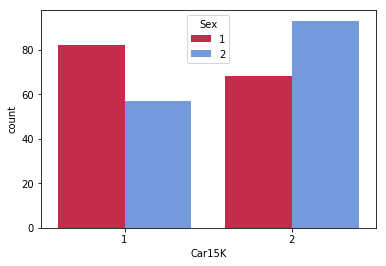

In [36]:
i = 2
show_barplot(i)
show_chi2(i)

Опять же при выборе между маленькой новой и большой подержанной машиной женщины склоняются к первому варианту, а мужчины ко второму. Различия в выборе также статистически значимы

Переменная  Reason


Reason,1.0,2.0,3.0,4.0,5.0,6.0
Sex,,,,,,
1.0,58,25,13,15,24,15
2.0,26,37,33,19,23,12


The test statistic: 24.033907173922653
The p-value of the test: 0.0002138796434356735


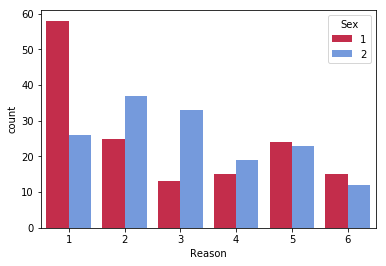

In [37]:
i = 3
show_barplot(i)
show_chi2(i)

Для женщин более важным параметром при выборе машины является безопасность, для мужчин-надёжность и стоимость. Мощность, комфортабельность и внешний вид играют примерно одинаковую роль для обоих полов. Различия в важности факторов также статистически значимы

Переменная  Cost


Cost,1.0,2.0,3.0,4.0
Sex,,,,
1.0,3,6,85,56
2.0,6,9,60,75


The test statistic: 8.666070018425902
The p-value of the test: 0.03407647064935651


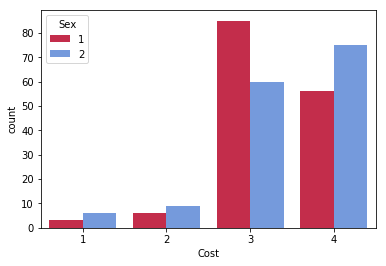

In [38]:
i = 4
show_barplot(i)
show_chi2(i)

И для мужчин, и для женщин стоимость важна, но для большинства мужчин этот критерий является максимально важным (решающе важным). Различия статистически значимы

Переменная  Reliable


Reliable,2.0,3.0,4.0
Sex,,,
1.0,0,17,133
2.0,2,30,118


The test statistic: 6.492159023480546
The p-value of the test: 0.03892652003231422


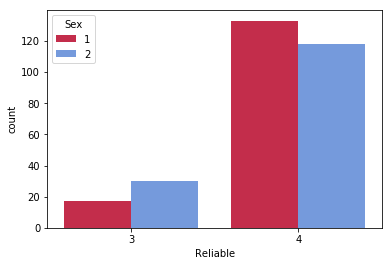

In [39]:
i = 5
print('Переменная ', 'Reliable')
group_sizes = df_raw.groupby(['Sex', 'Reliable']).size()
num_of_values = df_raw['Reliable'].nunique() + 1
plot_data = pd.DataFrame([(i, j, group_sizes[i][j]) for i in range(1, 3)
                          for j in range(3, 5)],
                         columns=['Sex', 'Reliable', 'count'])
sns.barplot(data=plot_data,
            x='Reliable',
            y='count',
            hue='Sex',
            palette=['crimson', 'cornflowerblue'])
show_chi2(i)

Видим, что пусть и не сильно, но всё равно для женщин надёжность автомобиля является более важным параметром, чем для мужчин. Различия статистически значимы

Переменная  Perform


Perform,1.0,2.0,3.0,4.0
Sex,,,,
1.0,1,11,58,80
2.0,2,16,78,54


The test statistic: 9.24521184925048
The p-value of the test: 0.0262022176341909


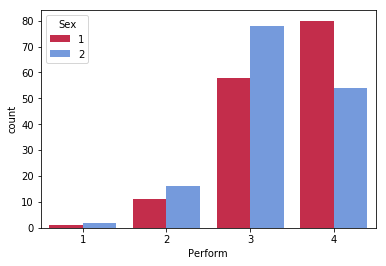

In [40]:
i = 6
show_barplot(i)
show_chi2(i)

Для женщин мощность (возможно, имеются в виду ходовые характеристики) автомобиля важнее, чем для мужчин. Различия статистически значимы.

Переменная  Fuel


Fuel,1.0,2.0,3.0,4.0
Sex,,,,
1.0,1,8,70,71
2.0,2,18,81,49


The test statistic: 9.01414501613177
The p-value of the test: 0.029103410788558062


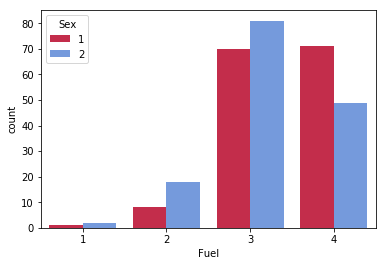

In [42]:
i = 7
show_barplot(i)
show_chi2(i)

По критерию расхода топлива женщины также оказались более требовательны, чем мужчины. Различия статистически значимы

Переменная  Safety


Safety,1.0,2.0,3.0,4.0
Sex,,,,
1.0,0,2,28,120
2.0,2,15,59,74


The test statistic: 33.89436997692785
The p-value of the test: 2.085565724833716e-07


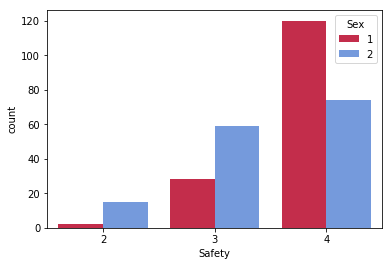

In [43]:
i = 8
print('Переменная ', features[i])
group_sizes = df_raw.groupby(['Sex', features[i]]).size()
num_of_values = df_raw[features[i]].nunique() + 1
plot_data = pd.DataFrame([(i, j, group_sizes[i][j]) for i in range(1, 3)
                          for j in range(2, num_of_values)],
                         columns=['Sex', features[i], 'count'])
sns.barplot(data=plot_data,
            x=features[i],
            y='count',
            hue='Sex',
            palette=['crimson', 'cornflowerblue'])
show_chi2(i)

Женщины намного более требовательны к безопасности автомобиля, чем мужчины. Различия статистически значимы

Переменная  AC/PS


AC/PS,1.0,2.0,3.0,4.0
Sex,,,,
1.0,12,28,47,63
2.0,21,44,47,38


The test statistic: 12.1982198219822
The p-value of the test: 0.006734088819250134


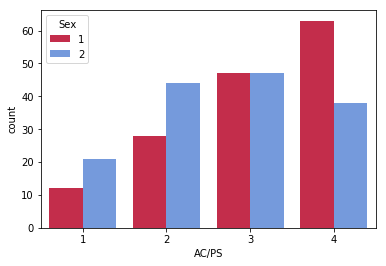

In [44]:
i = 9
show_barplot(i)
show_chi2(i)

Система кондиционирования и усилитель руля также более важны для женщин. Различия статистически значимы

Переменная  Park


Park,1.0,2.0,3.0,4.0
Sex,,,,
1.0,5,30,73,42
2.0,28,48,57,17


The test statistic: 32.746600292363006
The p-value of the test: 3.642431271850672e-07


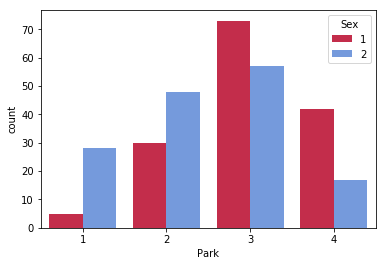

In [45]:
i = 10
show_barplot(i)
show_chi2(i)

Удобность парковки больше важна женщинам, нежели мужчинам. Различия статистически значимы

Переменная  Room


Room,1.0,2.0,3.0,4.0
Sex,,,,
1.0,4,18,94,34
2.0,9,26,82,33


The test statistic: 4.2107295689385245
The p-value of the test: 0.2395898450353886


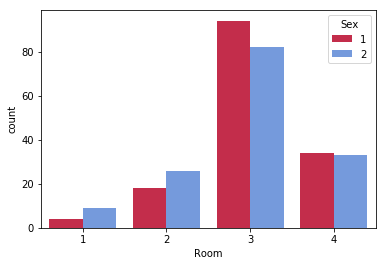

In [46]:
i = 11
show_barplot(i)
show_chi2(i)

Вместительность автомобиля одинаково ценится как мужчинами, так и женщинами

Переменная  Doors


Doors,1.0,2.0,3.0,4.0
Sex,,,,
1.0,25,36,58,31
2.0,32,44,47,27


The test statistic: 3.0878921441534875
The p-value of the test: 0.3782714544997431


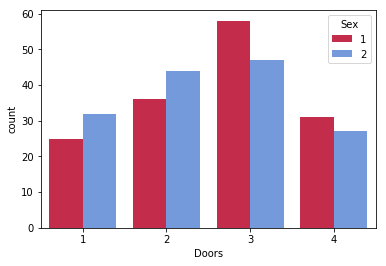

In [47]:
i = 12
show_barplot(i)
show_chi2(i)

Статистически значимой разницы в различии количества дверей в предпочитаемом автомобиле тоже нет

Переменная  Prestige


Prestige,1.0,2.0,3.0,4.0
Sex,,,,
1.0,41,56,41,12
2.0,45,63,33,9


The test statistic: 1.8912475109465534
The p-value of the test: 0.5952825012968646


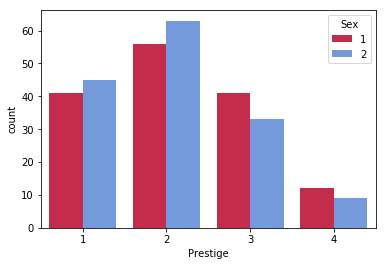

In [49]:
i = 13
show_barplot(i)
show_chi2(i)

Представителям обоих полов одинаково несильно важен престиж автомобился

Переменная  Colour


Colour,1.0,2.0,3.0,4.0
Sex,,,,
1.0,36,50,47,17
2.0,45,57,40,8


The test statistic: 5.261162316038242
The p-value of the test: 0.15364245484210964


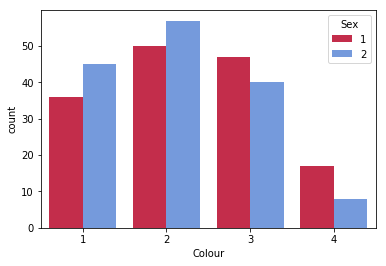

In [50]:
i = 14
show_barplot(i)
show_chi2(i)

Статистически значимых различий при выборе автомобилей разных цветов тоже нет

# Conslucion 
Можно заключить, что по большинству представленых признаков различия в выборе автомобиля между мужчинами и женщинами являются статистически значимыми. Однако также присутствуют критерии, по которым оба пола выбирают почти одинаково